In [1]:
%matplotlib widget
from matplotlib import pyplot as plt

In [2]:
import pylab as py
import numpy as np
from scipy.fft import fft, fftfreq
from scipy import signal

def sin(f = 1, T = 1, Fs = 128, phi =0 ):
    dt = 1.0/Fs
    t = np.arange(0,T,dt)
    s = np.sin(2*np.pi*f*t + phi)
    return (s,t)  


Fs = 500
T = 1
f_1 = 100
f_2 = 10

(y_1,t) = sin(f = 100.0, T=T, Fs=Fs)
y_2 = np.sin(2*np.pi*f_2*t)
y_3 = y_1*y_2
y_4 = signal.square(2 * np.pi * t/T,0.5)
y_5 = y_1*y_4

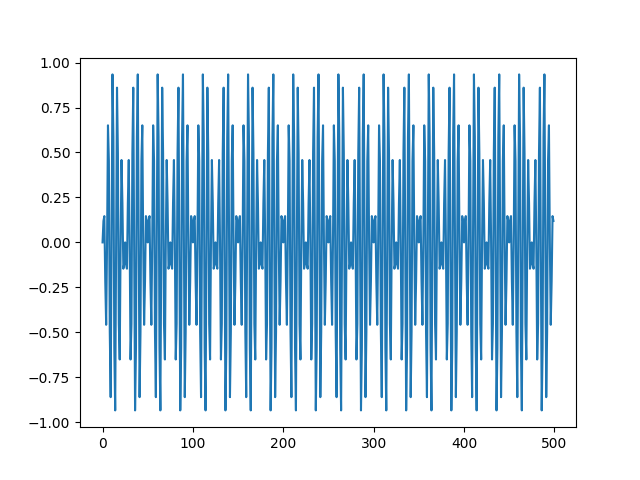

In [3]:
plt.plot(y_3)

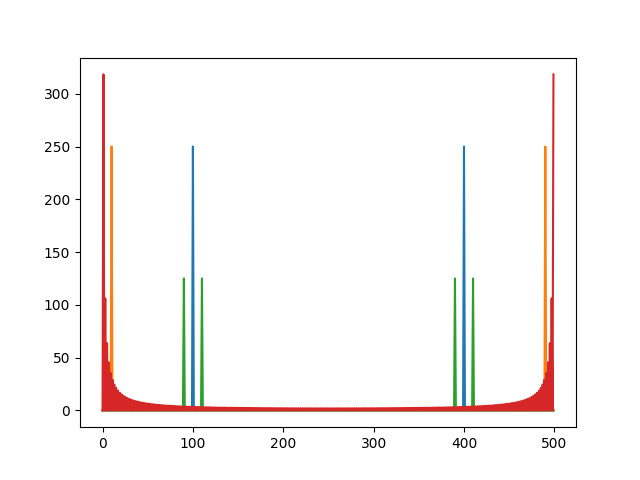

In [4]:
plt.figure()
plt.plot(np.abs(fft(y_1)))
plt.plot(np.abs(fft(y_2)))
plt.plot(np.abs(fft(y_3)))
plt.plot(np.abs(fft(y_4)))

# Zadanie 1

https://stackoverflow.com/questions/45422000/add-n-zeros-to-the-end-of-an-array

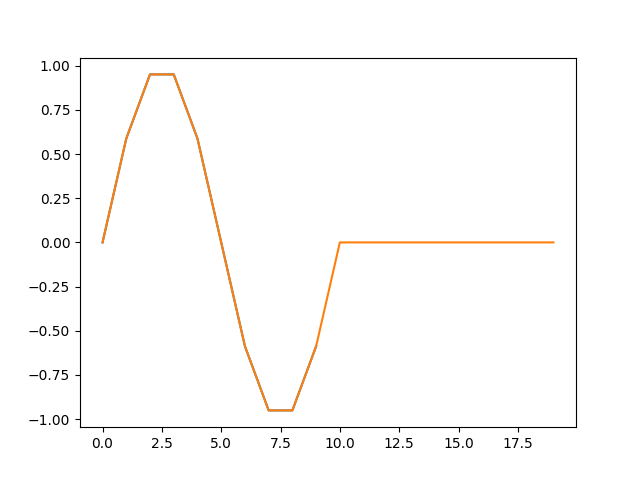

In [5]:
y_10, _ = sin(10, 0.1, 100)
plt.figure()
plt.plot(y_10)
y_10_padded = np.pad(y_10, (0, 10), 'constant')
plt.plot(y_10_padded)
xf_10 = fftfreq(len(y_10), 1/100)

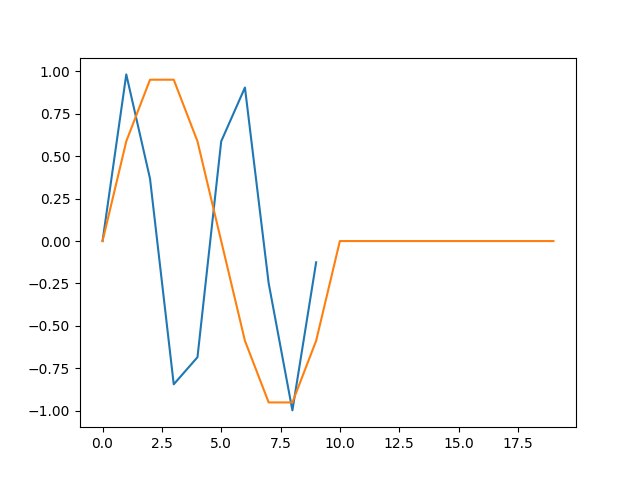

In [6]:
y_22, _ = sin(22, 0.1, 100)
plt.figure()
plt.plot(y_22)
y_22_padded = np.pad(y_22, (0, 10), 'constant')
xf_22 = fftfreq(len(y_22), 1/100)
plt.plot(y_10_padded)


## 10HZ

<StemContainer object of 3 artists>

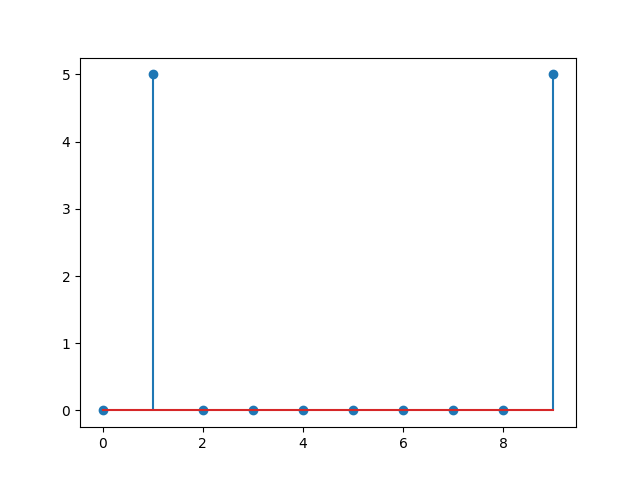

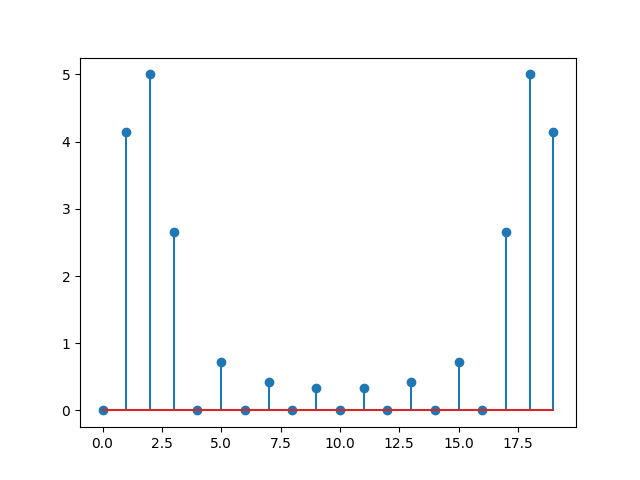

In [7]:
plt.figure()
plt.stem(np.abs(fft(y_10)))
plt.figure()
plt.stem(np.abs(fft(y_10_padded)))

## 22Hz

<StemContainer object of 3 artists>

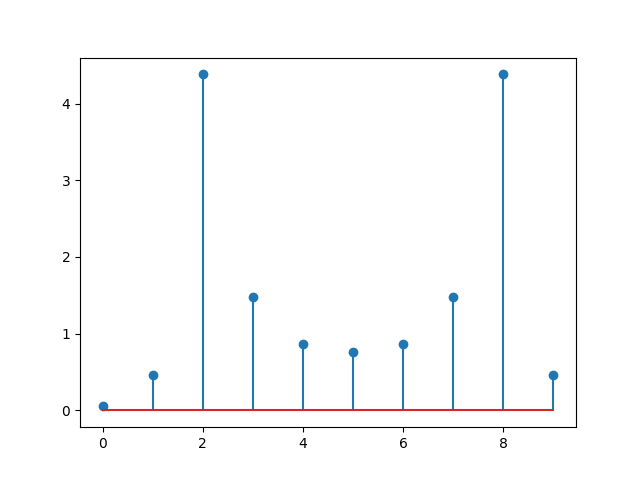

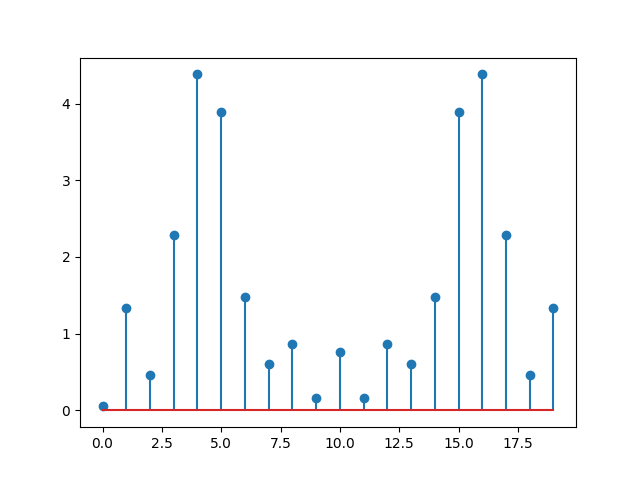

In [8]:
plt.figure()
plt.stem(np.abs(fft(y_22)))
plt.figure()
plt.stem(np.abs(fft(y_22_padded)))

## Sum

<StemContainer object of 3 artists>

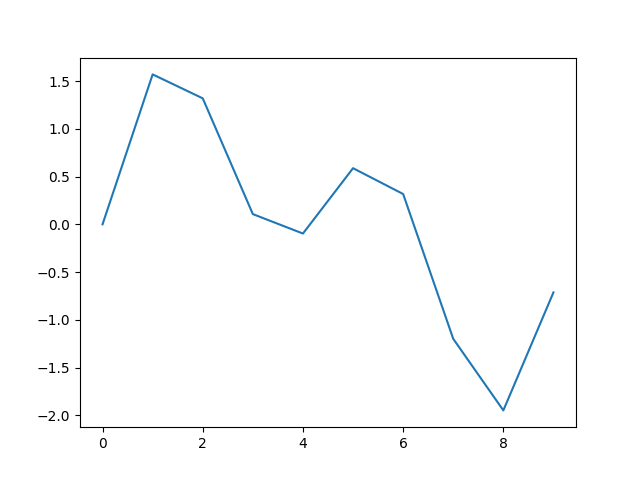

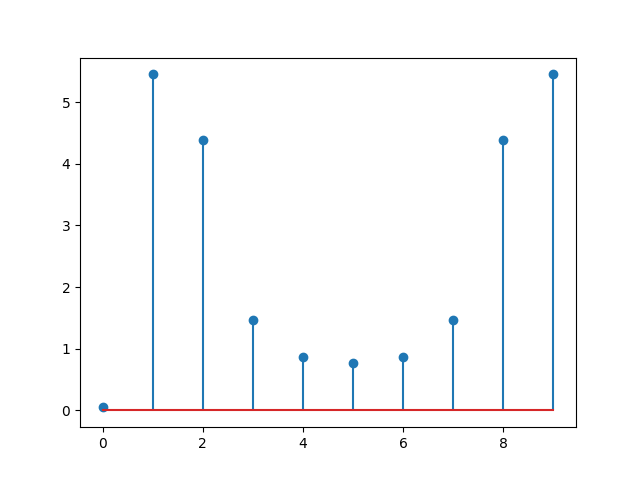

In [9]:
y_sum = y_10 + y_22
plt.figure()
plt.plot(y_sum)
plt.figure()
plt.stem(np.abs(fft(y_sum)))

<StemContainer object of 3 artists>

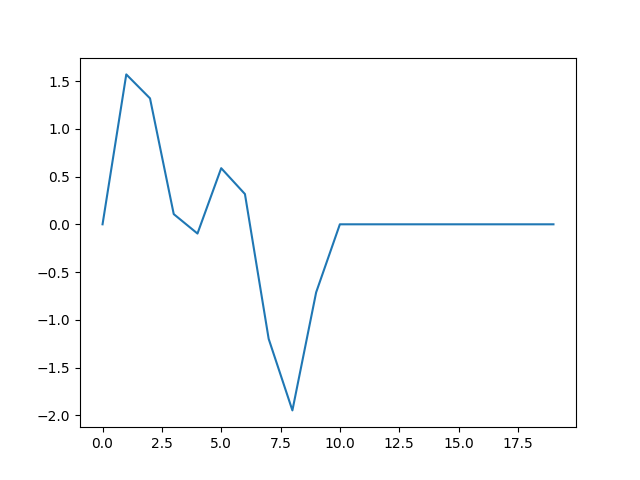

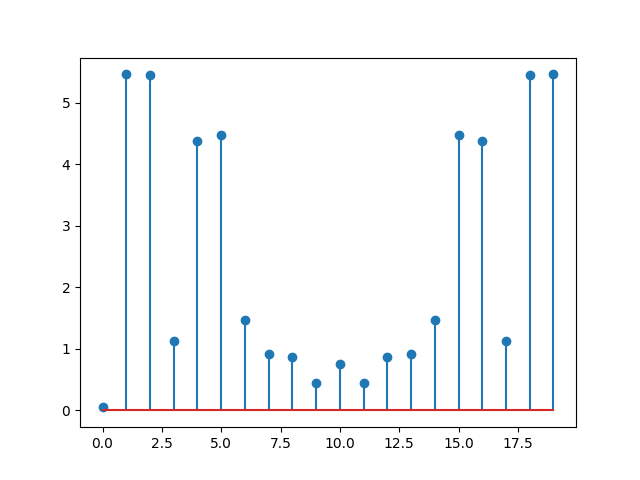

In [10]:
y_sum_padded = np.pad(y_sum, (0, 10), 'constant')
plt.figure()
plt.plot(y_sum_padded)
plt.figure()
plt.stem(np.abs(fft(y_sum_padded)))

## Hann window

<StemContainer object of 3 artists>

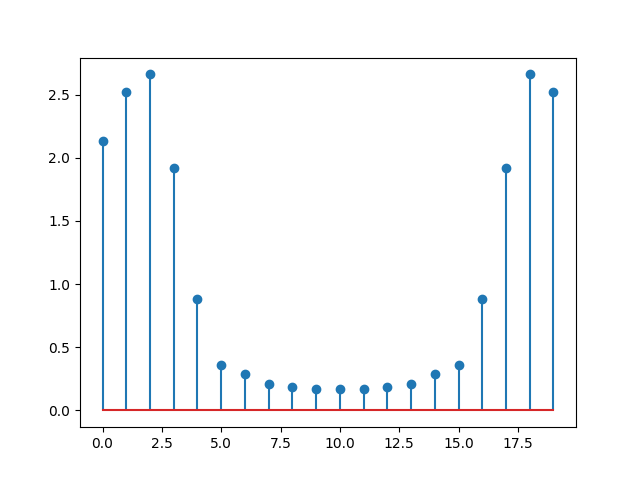

In [11]:
hann = np.hanning(len(y_10_padded))
y_10_hanned = y_10_padded * hann
plt.figure()
plt.stem(np.abs(fft(y_10_hanned)))

<StemContainer object of 3 artists>

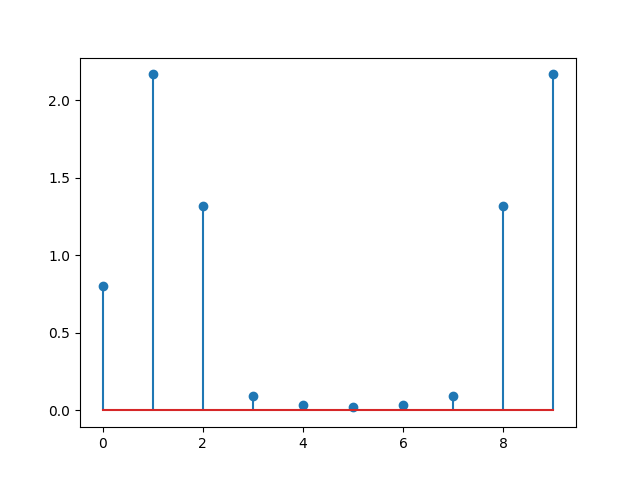

In [12]:
plt.figure()
hann = np.hanning(len(y_10))
y_10_hanned = y_10 * hann
plt.stem(np.abs(fft(y_10_hanned)))

# Zadanie 2

In [13]:
fs = 100
T = 1
N = int(fs * T)
y_f1, _ = sin(10.2, T, fs)
f = np.linspace(11.4,15.5,9)
def spect_dB(s, N_fft, F_samp):
    S = fft(s,N_fft)
    S_dB = 20 * np.log10(np.abs(S))
    F = fftfreq(N_fft, 1.0/F_samp)
    return (S_dB,F)
hann = np.hanning(N)
blackman = np.blackman(N)
hamming = np.hamming(N)
windows = [hann, blackman, hamming]

/tmp/ipykernel_3637/3392983629.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Done


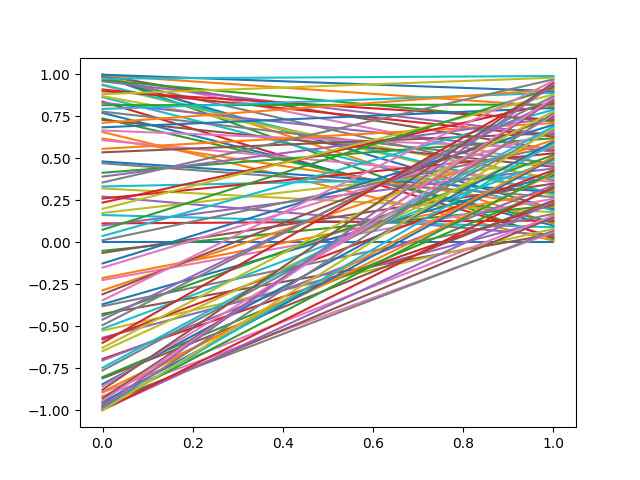

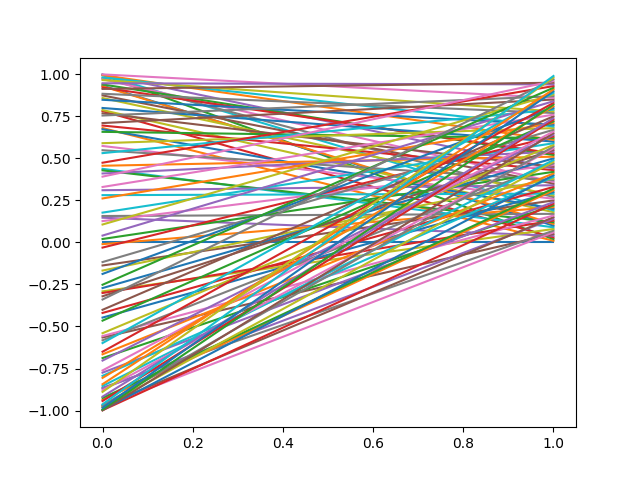

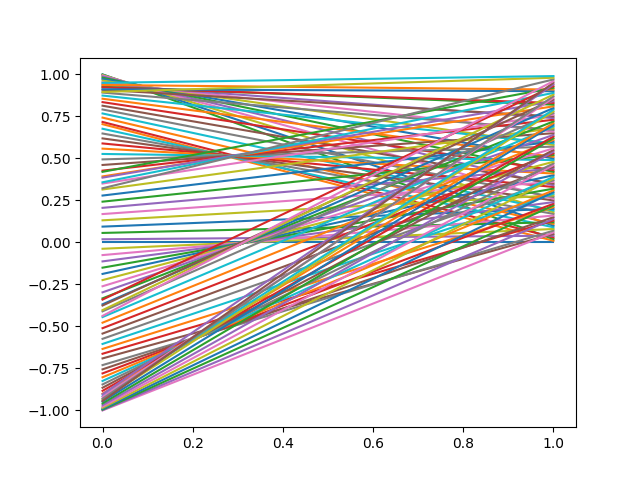

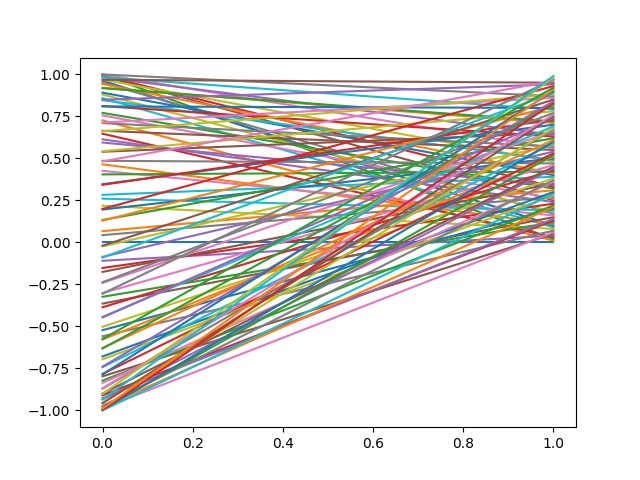

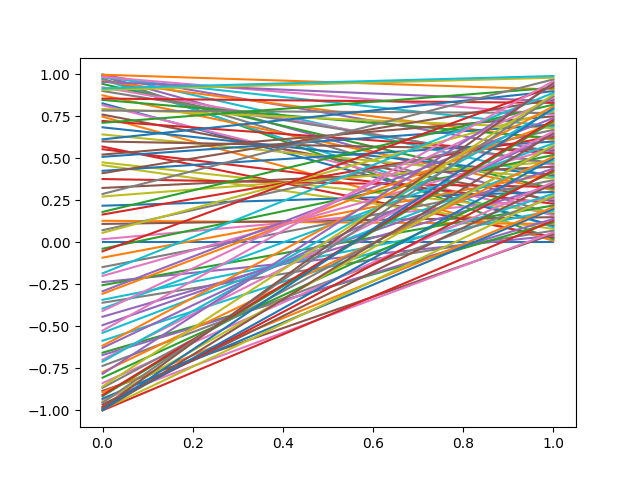

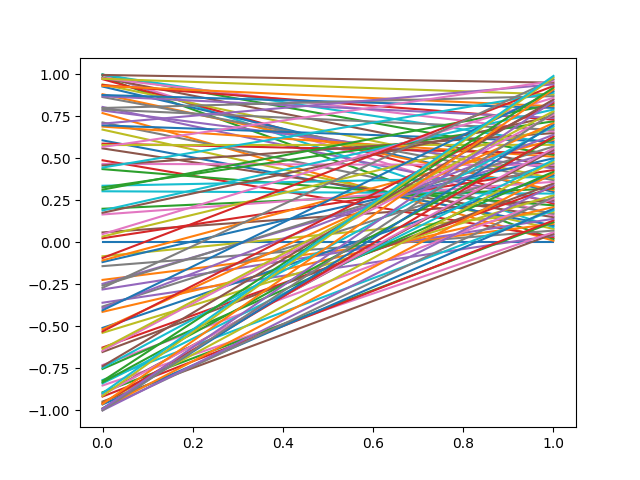

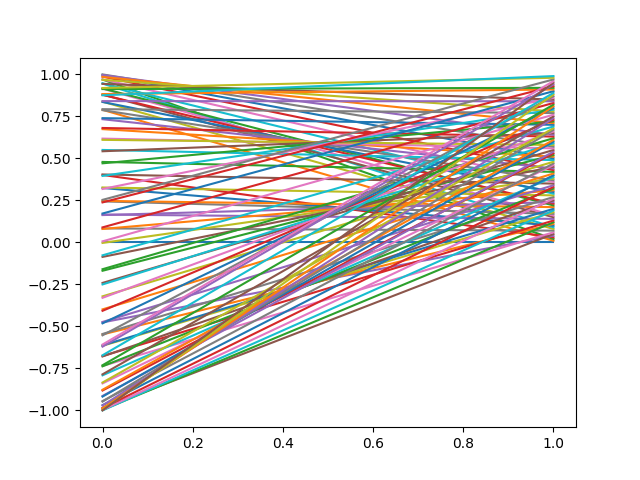

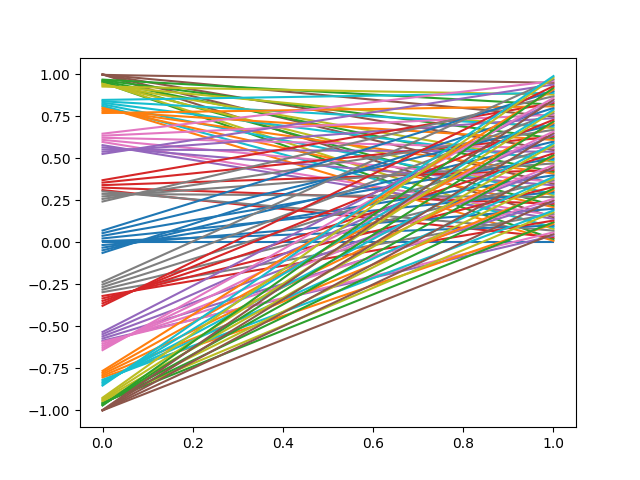

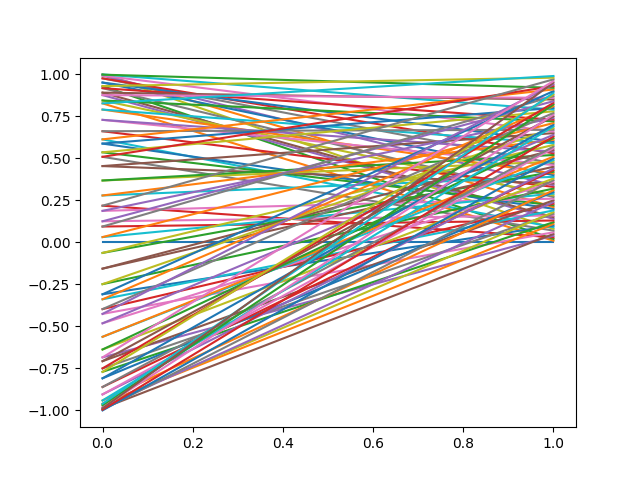

In [14]:
for f2 in f:
    plt.figure()
    y_f2 = sin(f2, T, fs)
    plt.plot(y_f2)
    # print(f2)
    # plt.figure()
    # summed = y_f1 + y_f2
    # for window in windows:
    #     y_windowed = summed * window
    #     s_db, F = spect_dB(y_windowed, N, fs)
    #     plt.plot(s_db)
print("Done")

# Zadanie 4

In [30]:
# (s, t) = sin(f, T, fs, theta)
fs = 500
T = 1
y = sin(10, T, fs)[0] + 0.5 * sin(45, T, fs)[0] + 2 * sin(50, T, fs)[0]
yf = fft(y)
fir = np.ones(len(yf))
fir[50] = 0
fir[450] = 0
filtered = yf * fir


## Oryginalny sygnał dla okna 1s

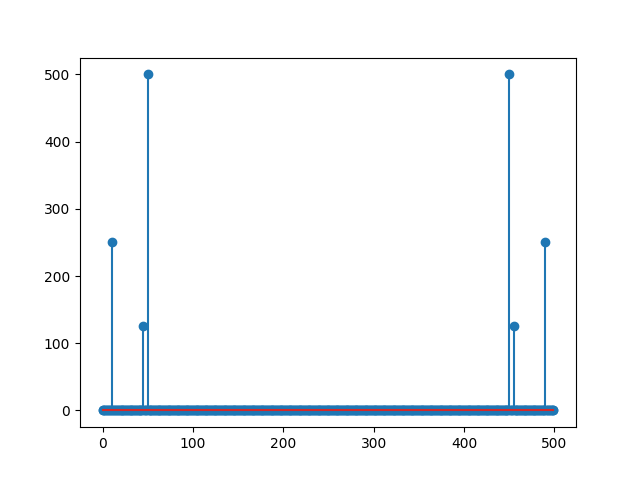

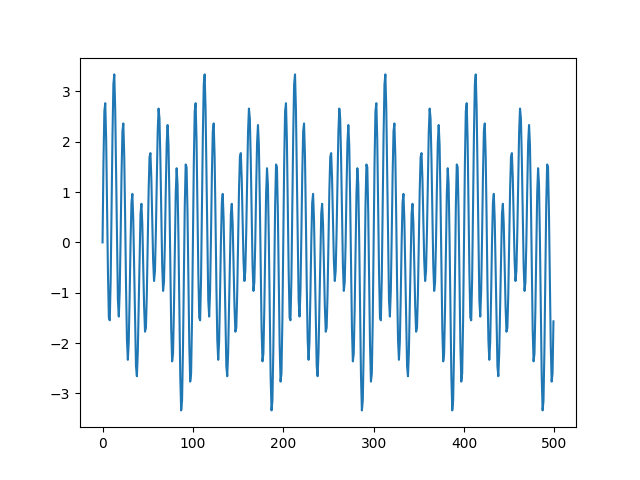

In [29]:
plt.figure()
plt.plot(y)
plt.figure()
plt.stem(np.abs(yf))
plt.show()

## Odfiltrowany sygnał z ground truth dla 1s

/home/lab/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


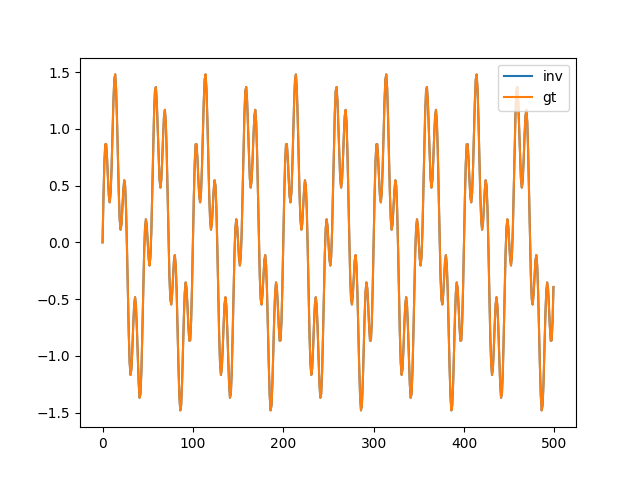

In [37]:
inv = np.fft.ifft(filtered)
ground_truth = sin(10, T, fs)[0] + 0.5 * sin(45, T, fs)[0]
plt.figure()
plt.plot(inv)
plt.plot(ground_truth)
plt.legend(["inv", "gt"])
plt.show()

## Oryginalny dla okna 1.11s

In [40]:
# (s, t) = sin(f, T, fs, theta)
fs = 500
T = 1.11
y = sin(10, T, fs)[0] + 0.5 * sin(45, T, fs)[0] + 2 * sin(50, T, fs)[0]
yf = fft(y)
fir = np.ones(len(yf))
fir[50] = 0
fir[450] = 0
filtered = yf * fir


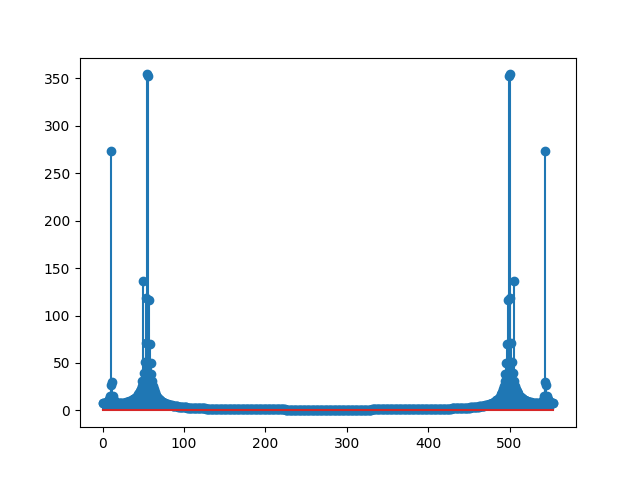

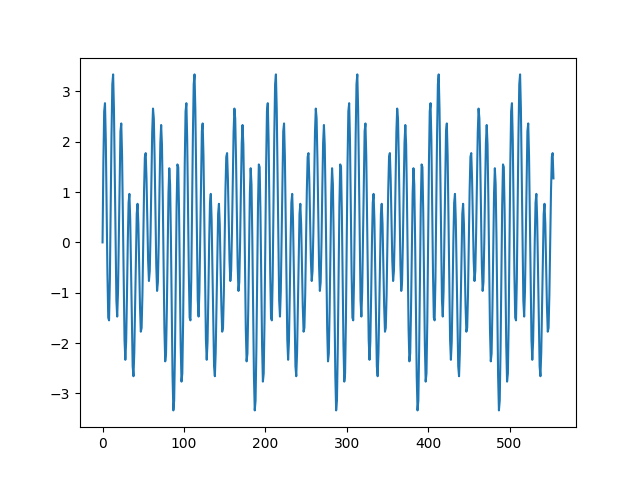

In [41]:
plt.figure()
plt.plot(y)
plt.figure()
plt.stem(np.abs(yf))
plt.show()

## Odfiltrowany dla okna 1.11s

/home/lab/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


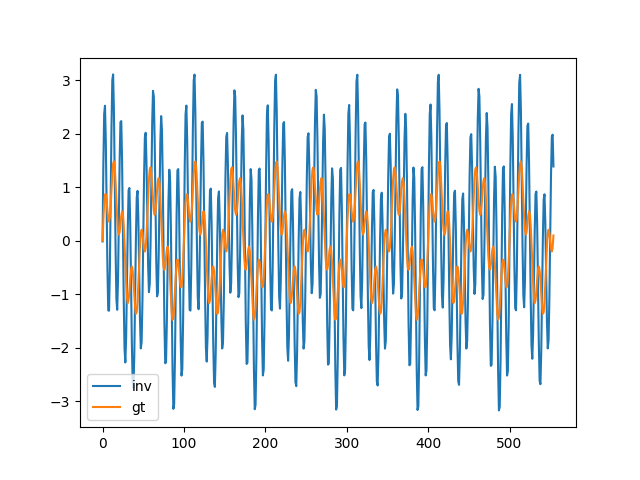

In [42]:
inv = np.fft.ifft(filtered)
ground_truth = sin(10, T, fs)[0] + 0.5 * sin(45, T, fs)[0]
plt.figure()
plt.plot(inv)
plt.plot(ground_truth)
plt.legend(["inv", "gt"])
plt.show()